In [38]:
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
import sklearn.neighbors
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

diabetes = sklearn.datasets.load_diabetes()

In [39]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [40]:
x = diabetes.data
y = diabetes.target

In [41]:
#Linear Regression
model = sklearn.linear_model.LinearRegression()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

model.fit(x_train,
          y_train)
y_pred = model.predict(x_test)

x_model_vals = np.linspace(0, 10, 50).reshape(-1,10)
y_model_vals = model.predict(x_model_vals)

print('MSE_linreg = ', mean_squared_error(y_test, y_pred))

MSE_linreg =  2900.1732878832318


In [42]:
#Cross-validation to select hyperparameters for n_neighbors for k-nearest neighbors 
from sklearn.model_selection import cross_val_score

In [43]:
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

loss = cross_val_score(model1,
                       x_train,
                       y_train, 
                       cv=5, 
                       scoring='neg_mean_squared_error')
loss

array([-4250.91236307, -4645.72143975, -4536.07668232, -4767.94920635,
       -3825.44603175])

In [44]:
np.mean(np.sqrt(-loss))

66.3218962404476

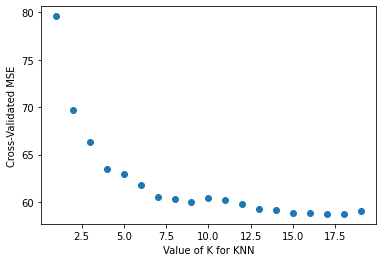

In [45]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    k_scores.append(np.mean(np.sqrt(-loss)))

plt.scatter(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [46]:
def knntest(n=1):
    model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

    model1.fit(x_train,
              y_train)

    y_pred1 = model1.predict(x_test)

    print('MSE_knn = ', mean_squared_error(y_test, y_pred1))

knntest(n=17)

MSE_knn =  3003.3901481279886


In [47]:
#CROSS VALIDATION TO FIND max_depth FOR DECISION TREES
model2 = sklearn.tree.DecisionTreeRegressor(max_depth=2)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

loss = cross_val_score(model2,
                       x_train,
                       y_train, 
                       cv=5, 
                       scoring='neg_mean_squared_error')
loss

array([-3233.45656687, -4598.26756449, -3369.71968074, -4336.12237338,
       -3334.67329867])

In [48]:
np.mean(np.sqrt(-loss))

61.26383483081285

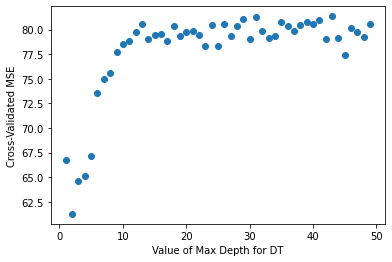

In [49]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

max_range = range(1, 50)
max_depth_vals = []
for m in max_range:
    dt = sklearn.tree.DecisionTreeRegressor(max_depth=m)
    loss = cross_val_score(dt,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    max_depth_vals.append(np.sqrt(-loss).mean())

plt.scatter(max_range, max_depth_vals)
plt.xlabel('Value of Max Depth for DT')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [50]:
def dtMax(n=1):
    model2 = sklearn.tree.DecisionTreeRegressor(max_depth=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)
    
    model2.fit(x_train,
          y_train)
    y_pred2 = model2.predict(x_test)
    
    print('MSE_depth',n,' = ', mean_squared_error(y_test, y_pred2))
    
    #TREE VISUALIZATION FOR DECISION TREE
    text_representation = sklearn.tree.export_text(model2)
    print(text_representation)

In [51]:
dtMax(n=2)

MSE_depth 2  =  3866.038156768628
|--- feature_2 <= 0.01
|   |--- feature_8 <= 0.01
|   |   |--- value: [100.56]
|   |--- feature_8 >  0.01
|   |   |--- value: [164.67]
|--- feature_2 >  0.01
|   |--- feature_2 <= 0.07
|   |   |--- value: [191.10]
|   |--- feature_2 >  0.07
|   |   |--- value: [271.08]



In [52]:
#CROSS VALIDATION TO FIND max_depth FOR RANDOM FORESTS
model3 = sklearn.ensemble.RandomForestRegressor(max_depth=2)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

loss = cross_val_score(model3,
                       x_train,
                       y_train, 
                       cv=5, 
                       scoring='neg_mean_squared_error')
loss

array([-3133.25869987, -4088.82361857, -3081.74252988, -3816.16475868,
       -3297.02888509])

In [53]:
np.mean(np.sqrt(-loss))

58.92554961704676

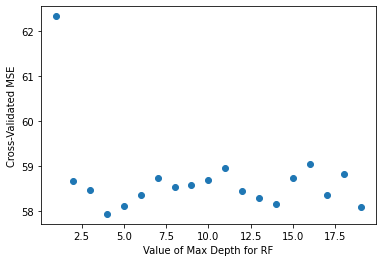

In [54]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

max_range1 = range(1, 20)
max_depth_vals1 = []
for m in max_range1:
    rf = sklearn.ensemble.RandomForestRegressor(max_depth=m)
    loss = cross_val_score(rf,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    max_depth_vals1.append(np.sqrt(-loss).mean())

plt.scatter(max_range1, max_depth_vals1)
plt.xlabel('Value of Max Depth for RF')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [58]:
def rfMax(n=1):
    model3 = sklearn.ensemble.RandomForestRegressor(max_depth=2)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)
    
    model3.fit(x_train,
          y_train)
    y_pred3 = model3.predict(x_test)
    
    print('MSE_depth',n,' = ', mean_squared_error(y_test, y_pred3))
    
    #TREE VISUALIZATION FOR RANDOM FOREST
    text_representation = sklearn.tree.export_text(model3.estimators_[0])
    print(text_representation)

rfMax(n=4)

MSE_depth 4  =  2971.8117032766804
|--- feature_8 <= 0.00
|   |--- feature_3 <= 0.03
|   |   |--- value: [101.66]
|   |--- feature_3 >  0.03
|   |   |--- value: [163.93]
|--- feature_8 >  0.00
|   |--- feature_2 <= 0.04
|   |   |--- value: [176.63]
|   |--- feature_2 >  0.04
|   |   |--- value: [241.27]



In [59]:
#LINEAR REGRESSION MSE = 2900.1732878832318

#KNN MSE
knntest(n=17)

#DECISION TREE MSE
dtMax(n=2)

#RANDOM FOREST MSE
rfMax(n=4)

#LINEAR REGRESSION PERFORMED BEST

MSE_knn =  3003.3901481279886
MSE_depth 2  =  3866.038156768628
|--- feature_2 <= 0.01
|   |--- feature_8 <= 0.01
|   |   |--- value: [100.56]
|   |--- feature_8 >  0.01
|   |   |--- value: [164.67]
|--- feature_2 >  0.01
|   |--- feature_2 <= 0.07
|   |   |--- value: [191.10]
|   |--- feature_2 >  0.07
|   |   |--- value: [271.08]

MSE_depth 4  =  2976.5681553099043
|--- feature_2 <= 0.01
|   |--- feature_7 <= 0.03
|   |   |--- value: [98.48]
|   |--- feature_7 >  0.03
|   |   |--- value: [181.66]
|--- feature_2 >  0.01
|   |--- feature_8 <= 0.03
|   |   |--- value: [183.44]
|   |--- feature_8 >  0.03
|   |   |--- value: [247.20]

